### Goals
1.  Plotting graphs using
    [matplotlib](https://matplotlib.org/api/pyplot_api.html)
2.  Reading and plotting image histograms.
3.  Working with
    [clustering](http://scikit-learn.org/stable/modules/clustering.html)
    and
    [classification](http://scikit-learn.org/stable/modules/svm.html)
    algorithms



#### Exercise 2.1 \[★\]
[matplotlib](https://matplotlib.org/api/pyplot_api.html) can be used to
plot graphs. Given below is a very simple code with only x values. After
importing the *matplotlib* library, we initialize x values and plot it.



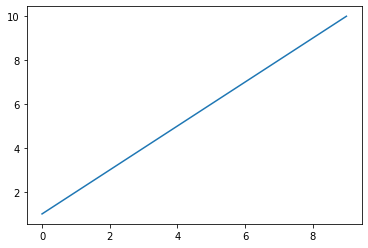

In [1]:
               
import matplotlib.pyplot as plot
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x)
plot.show()
               
              



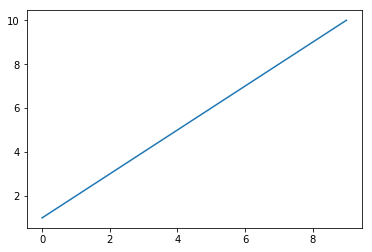



Now let's change the color, style and width of the line.



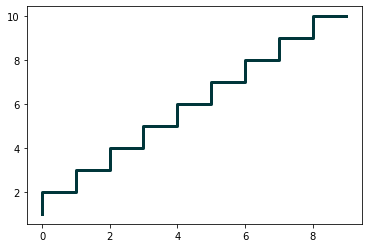

In [2]:
               
import matplotlib.pyplot as plot
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()
               
              



We will now initialize the y-values and plot the graph.

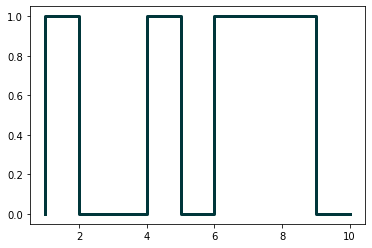

In [3]:

               
import matplotlib.pyplot as plot
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
plot.plot(x, y, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()
               
              



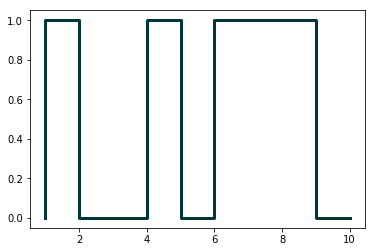



In the [first practical session](./practicals1.html), we saw how to
parse JSON files. Continuing with the same
[JSON](../../data/pl.json) file, we will now plot the results
of number of programming languages released per year. Verify the output.



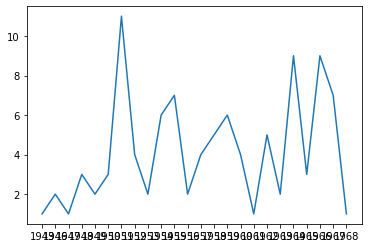

In [4]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot
data = json.load(open('../../data/pl.json'))
dataframe = json_normalize(data)
grouped = dataframe.groupby('year').count()
plot.plot(grouped)
plot.show()
               
              



Following program will add title and labels to the x-axis and y-axis.



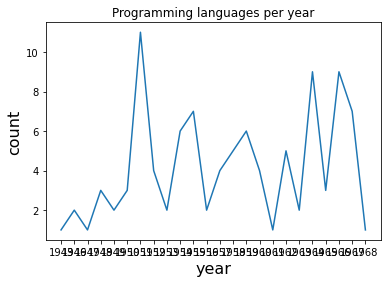

In [19]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot
data = json.load(open('../../data/pl.json'))
dataframe = json_normalize(data)
grouped = dataframe.groupby('year').count()
plot.plot(grouped)
plot.title("Programming languages per year")
plot.xlabel('year',  fontsize=16)
plot.ylabel('count',  fontsize=16)
plot.show()

There is yet another way to plot the dataframes, by using
[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).



<AxesSubplot:title={'center':'Programming languages per year'}, xlabel='year'>

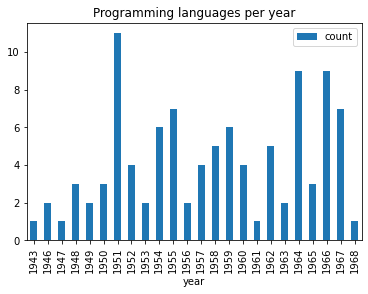

In [9]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot
data = json.load(open('../../data/pl.json'))
dataframe = json_normalize(data)
grouped = dataframe.groupby('year').count()
grouped = grouped.rename(
  columns={'languageLabel':'count'}).reset_index()
grouped.plot(x=0, kind='bar', title="Programming languages per year")

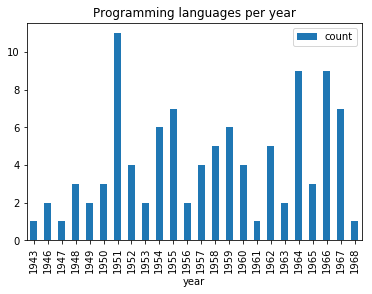
Now, we want to create multiple subplots. A simple way is given below.
Recall in [first practical session](./practicals1.html), we did group by
on multiple columns. Subplots can be used to visualize these data.



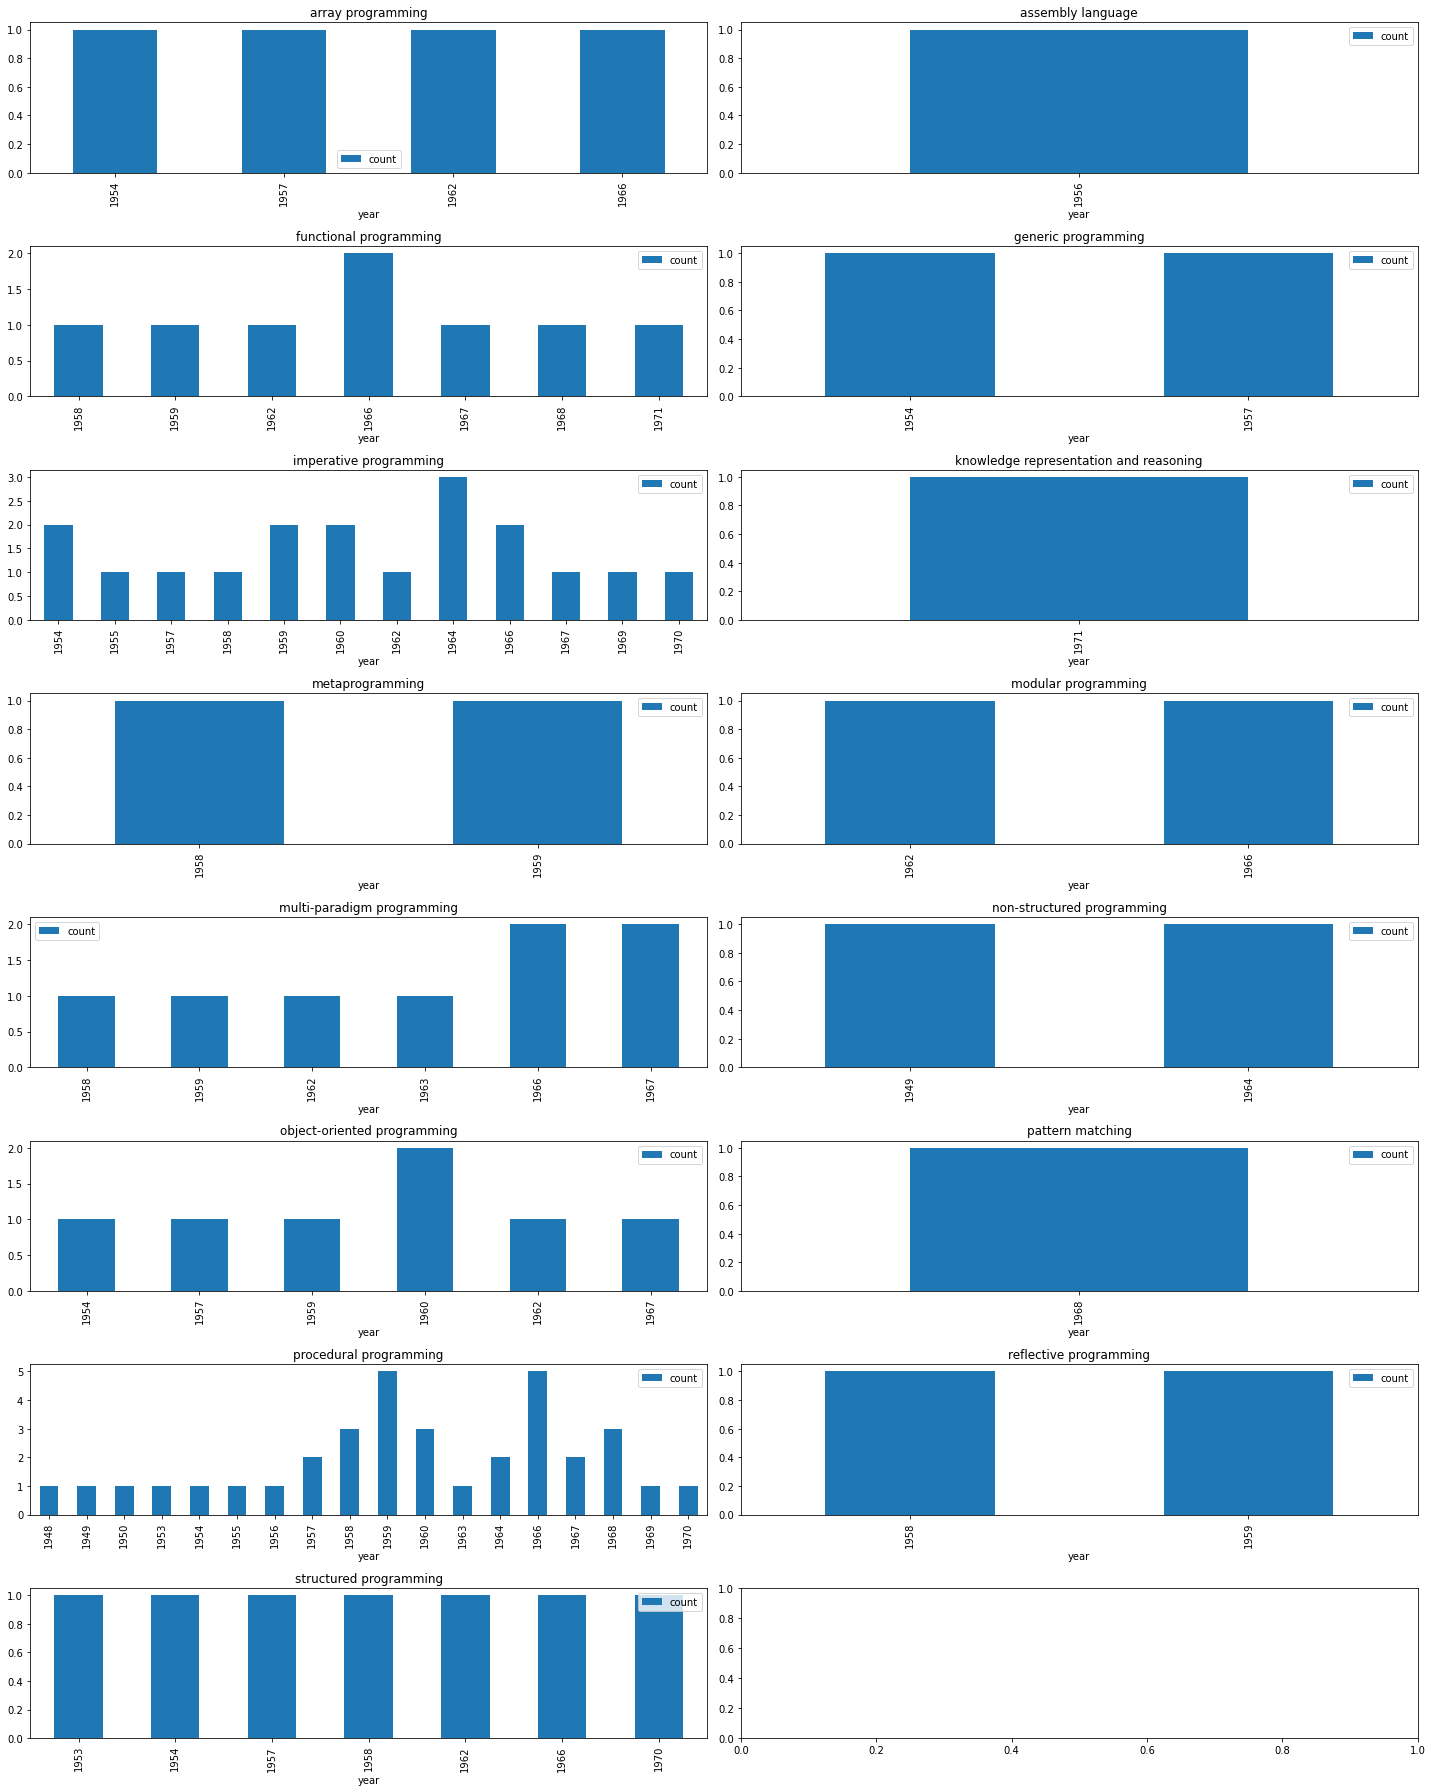

In [21]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot
jsondata = json.load(open('../../data/plparadigm.json'))
array = []

for data in jsondata:
    array.append([data['year'], data['languageLabel'],
      data['paradigmLabel']])
dataframe = pd.DataFrame(array, columns=['year', 'languageLabel',
      'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64",
      "languageLabel" : "<U200",
      "paradigmLabel" : "<U200"})
grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['paradigmLabel'])

#Initialization of subplots
nr = math.ceil(grouped.ngroups/2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20,25))

#Block overlap of figures and data
fig.set_tight_layout(True)

#Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(x='year', y='count', kind='bar',
    title=group, ax=axes[math.floor(i/2),i%2])
plot.show()


C:\Users\arthu\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


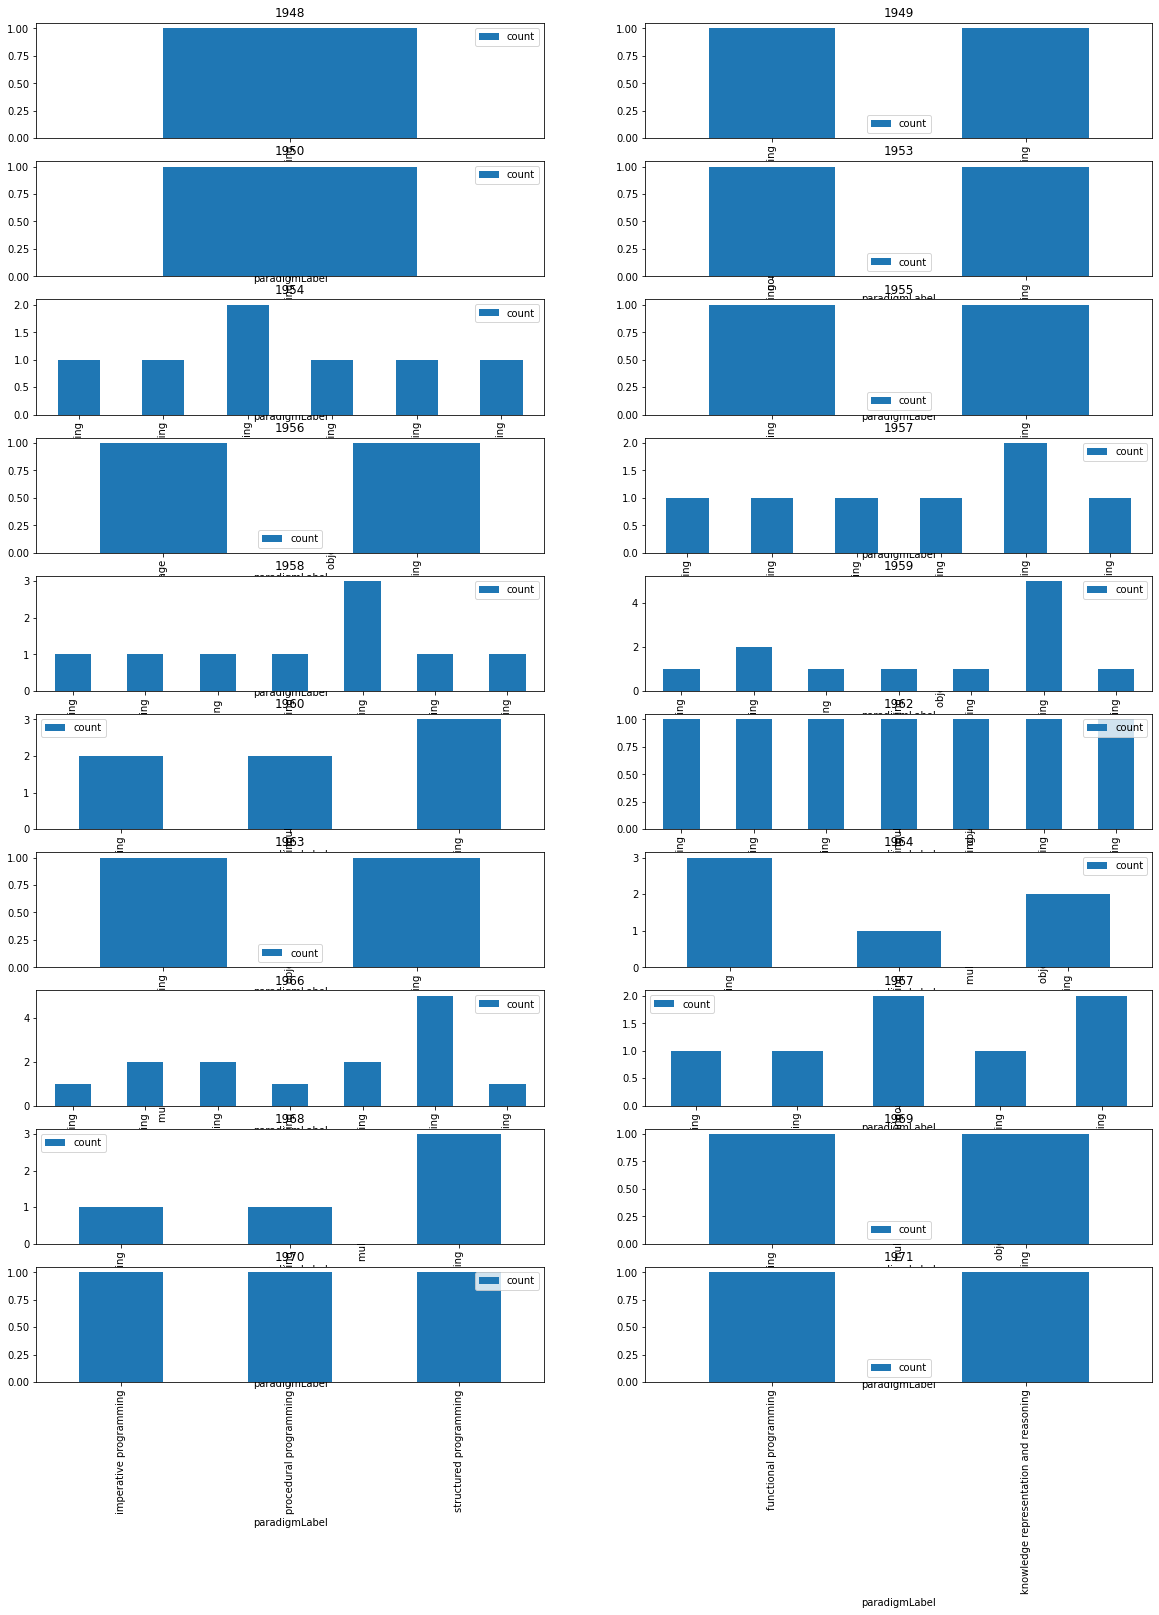

In [29]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot
jsondata = json.load(open('../../data/plparadigm.json'))
array = []

for data in jsondata:
    array.append([data['year'], data['languageLabel'],
      data['paradigmLabel']])
dataframe = pd.DataFrame(array, columns=['year', 'languageLabel',
      'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64",
      "languageLabel" : "<U200",
      "paradigmLabel" : "<U200"})
grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['year'])

#Initialization of subplots
nr = math.ceil(grouped.ngroups/2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20,25))

#Block overlap of figures and data
fig.set_tight_layout(True)

#Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(x='paradigmLabel', y='count', kind='bar',
    title=group, ax=axes[math.floor(i/2),i%2])
plot.show()


![](attachment:../../images/subplots.png)
Make changes to the above code, so that we can get visual information on
count of languages of different programming paradigms released in every
available year, i.e, for each year, we want to see the count of
programming languages belonging to each programming language paradigm.



#### Exercise 2.2 \[★\]
In this exercise, we will work on images. Download an image (e.g.,
[picture.bmp](../../images/picture.bmp) and
[flower.jpg](../../images/flower.jpg)) in your current
working folder and open it in the following manner. We will first try to
get some metadata of the image.



In [22]:
import os,sys
from PIL import Image
imgfile = Image.open("../../images/picture.bmp")
print(imgfile.size, imgfile.format)

(640, 480) BMP


We use Image module of Python PIL library
([Documentation](http://www.effbot.org/imagingbook/image.htm)). We will
now try to get data of 100 pixels from an image.



In [23]:
import os,sys
from PIL import Image
imgfile = Image.open("../../images/flower.jpg")
data = imgfile.getdata()
for i in range(10):
    for j in range(10):
        print(i,j, data.getpixel((i,j)))

0 0 (102, 94, 105)
0 1 (77, 69, 82)
0 2 (77, 70, 86)
0 3 (75, 71, 86)
0 4 (75, 71, 86)
0 5 (77, 71, 85)
0 6 (78, 70, 83)
0 7 (80, 70, 81)
0 8 (78, 70, 83)
0 9 (80, 69, 83)
1 0 (78, 70, 83)
1 1 (53, 45, 58)
1 2 (53, 46, 62)
1 3 (50, 46, 61)
1 4 (53, 46, 62)
1 5 (52, 46, 60)
1 6 (53, 45, 58)
1 7 (55, 45, 56)
1 8 (55, 44, 58)
1 9 (54, 43, 57)
2 0 (76, 70, 82)
2 1 (53, 45, 60)
2 2 (53, 45, 60)
2 3 (52, 46, 60)
2 4 (53, 47, 61)
2 5 (54, 46, 59)
2 6 (55, 44, 58)
2 7 (56, 44, 58)
2 8 (54, 44, 55)
2 9 (54, 42, 54)
3 0 (78, 72, 86)
3 1 (55, 47, 62)
3 2 (56, 48, 63)
3 3 (55, 47, 60)
3 4 (56, 48, 61)
3 5 (57, 46, 60)
3 6 (56, 45, 59)
3 7 (56, 44, 58)
3 8 (54, 42, 54)
3 9 (53, 41, 53)
4 0 (80, 74, 86)
4 1 (57, 49, 62)
4 2 (57, 49, 60)
4 3 (57, 49, 60)
4 4 (59, 49, 60)
4 5 (57, 47, 56)
4 6 (56, 44, 54)
4 7 (56, 43, 53)
4 8 (54, 41, 51)
4 9 (52, 39, 49)
5 0 (82, 76, 90)
5 1 (59, 51, 64)
5 2 (61, 50, 64)
5 3 (59, 49, 60)
5 4 (58, 48, 57)
5 5 (57, 45, 55)
5 6 (55, 43, 53)
5 7 (54, 41, 51)
5 8 (53, 40,

You may notice the pixel position and pixel values (a tuple of 3
values). Let's try to get additional metadata of the images, i.e., mode
of image (e.g., RGB), number of bands, number of bits for each band,
width and height of image (in pixels).



In [24]:
import os,sys
from PIL import Image
imgfile = Image.open("../../images/flower.jpg")
print(imgfile.mode, imgfile.getbands(), imgfile.bits,
  imgfile.width, imgfile.height)
              
             



RGB ('R', 'G', 'B') 8 640 480


Let's now get an histogram of colors. When you execute the following
code, you will get a single array of values, frequency of each band (R,
G, B etc.) concatenated together. In the following code, we will assume
that we are working with an image of 3 bands (RGB mode) and each band is
represented by 8 bits. We will plot the
[histogram](http://www.effbot.org/imagingbook/image.htm#tag-Image.Image.histogram)
of different colors.



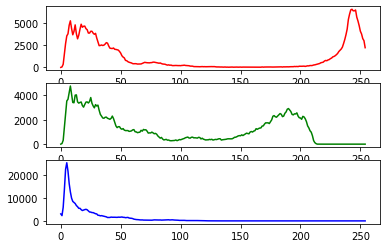

In [25]:
from PIL import Image
import matplotlib.pyplot as plot
imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color='red')
axis2.plot(green, color='green')
axis3.plot(blue, color='blue')
plot.show()
               
              



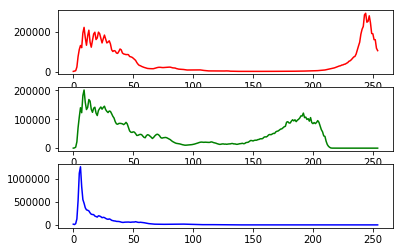
But if wish to see all of them in one single plot.



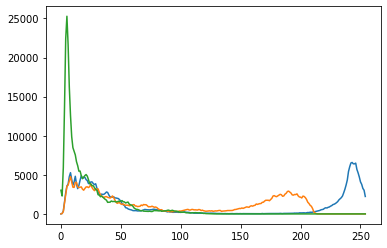

In [26]:
from PIL import Image
import matplotlib.pyplot as plot
imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x=range(255)
y = []
for i in x:
    y.append((red[i],green[i],blue[i]))
plot.plot(x,y)
plot.show()

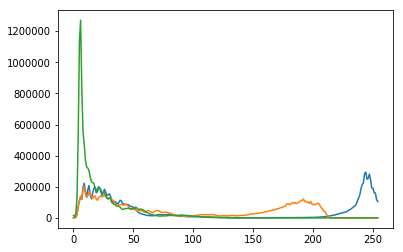
But we do not wish to loose the band colors.



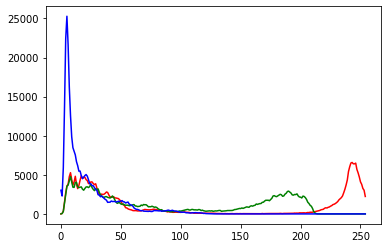

In [27]:
from PIL import Image
import matplotlib.pyplot as plot
imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x=range(255)
y = []
for i in x:
    y.append((red[i],green[i],blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle('color', ['red', 'green', 'blue'])
plot.plot(x,y)
plot.show()

![](attachment:../../images/histogramplotcolors.png)
Your next question is to get the top 20 intensities in each band and
create a single plot of these top intensities. Write a python program
that can achieve this.

In [40]:
from PIL import Image
import matplotlib.pyplot as plot
import numpy as np

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

x=range(255)
y = []
for i in x:
    y.append((red[i],green[i],blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle('color', ['red', 'green', 'blue'])
plot.plot(x,y)
plot.show()

IndexError: list index out of range


#### Exercise 2.3 \[★★\]
In this exercise, we will take a look at [KMeans clustering
algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
Continuing with images, we will now find 4 predominant colors in an
image.



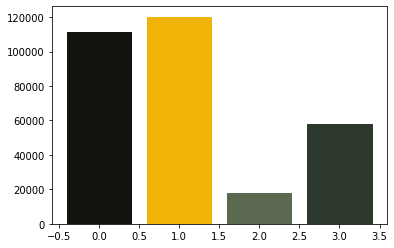

In [30]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters = 4)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color('#%02x%02x%02x' % (
    math.ceil(clusters.cluster_centers_[i][0]), 
        math.ceil(clusters.cluster_centers_[i][1]),
    math.ceil(clusters.cluster_centers_[i][2])))
plot.show()

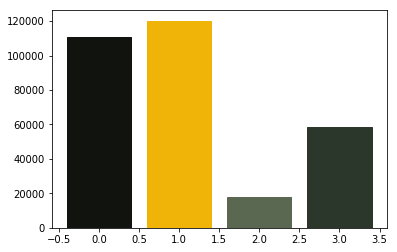
For your next question, your goal is to understand the above code and
achieve the following:
1.  Assume that the number of clusters is given by the user, generalize
    the above code.
2.  In case of bar chart, ensure that the bars are arranged in the
    descending order of the frequency of colors.
3.  Also add support for pie chart in addition to the bar chart. Ensure
    that we use the image colors as the wedge colors. (e.g., given
    below)
4.  Do you have any interesting observations?
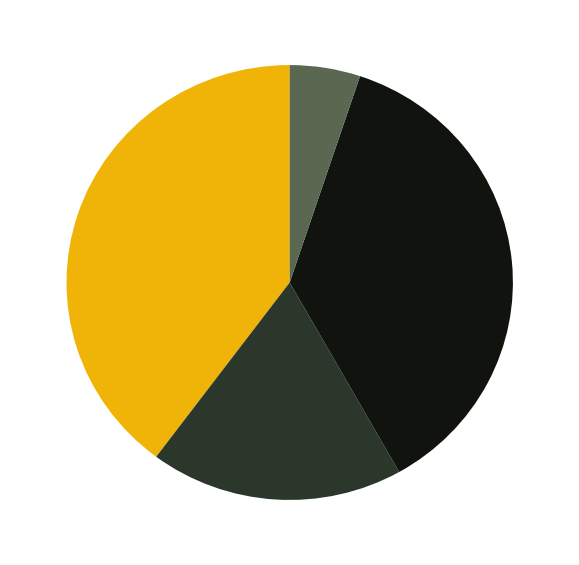



#### Exercise 2.4 \[★★\]
We will try to get more clusters and also check the time taken by each
of these algorithms.
Let's start with some very simple exercises to experiment with the
KMeans algorithm. Consider the following data and visualize it on a
using a scatter plot.



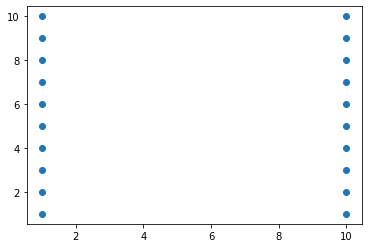

In [31]:
import numpy as np
import matplotlib.pyplot as plot

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
 [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
 [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
 [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])

plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()



Visually, it is quite evident that there are two clusters. But let's
use KMeans algorithm to obtain the 2 clusters. We will first see the
labels of our clustered data.



In [32]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
 [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
 [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
 [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])

clusters = KMeans(n_clusters = 2)
clusters.fit(numarray)
print(clusters.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


Now, we will visualize the clusters using a scatter plot. We will use
two colors for visually distinguishing them.



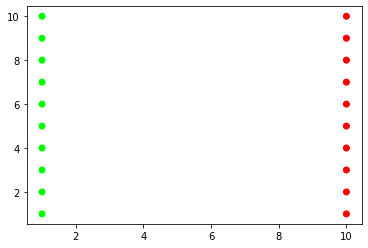

In [33]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
 [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
 [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
 [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])
    
clusters = KMeans(n_clusters = 2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])
        
plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()



What if we tried to obtain 4 clusters? Try running the following code,
multiple times. Any observation? Try changing the value of *n_init*
with higher values.



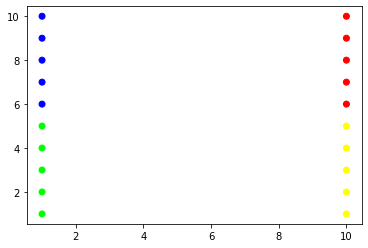

In [43]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], 
 [1, 6], [1, 7], [1, 8],[1, 9], [1, 10], 
 [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], 
 [10, 6], [10, 7], [10, 8],[10, 9], [10, 10]])
    
clusters = KMeans(n_clusters = 4, n_init=500)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])
        
plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Now we will try obtaining clusters with some real data (reference:
[citypopulation.json](../../data/citypopulation.json),
Source: Wikidata). It contains information concerning different cities
of the world: city name, year of its foundation and its population in
the year 2010. In the following code, we want to cluster population data
and to observe whether there is any correlation between age and recent
population (2010) statistics. In the following code, there is a
commented line. You can un-comment it to try with different population
numbers. Any observation? Why did we use LabelEncoder? What is its
purpose?



In [35]:
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json
data = json.load(open('../../data/citypopulation.json'))
dataframe = json_normalize(data)
le = LabelEncoder()
dataframe['cityLabel'] = le.fit_transform(dataframe['cityLabel'])
dataframe = dataframe.astype(dtype= {"year":"<i4",
"cityLabel":"<U200", "population":"i"})
dataframe = dataframe.loc[dataframe['year'] > 1500]
#dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[['year', 'population']]
clusters = KMeans(n_clusters = 2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])
   
plot.rcParams['figure.figsize'] = [10, 10]
plot.scatter(yearPopulation['year'], yearPopulation['population'],
      c=colors[clusters.labels_])
plot.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/citypopulation.json'

Now let's continue working with
[flower.jpg](../../images/flower.jpg). Let's start once
again with **KMeans** and try to get clusters of size between 2 and 11.



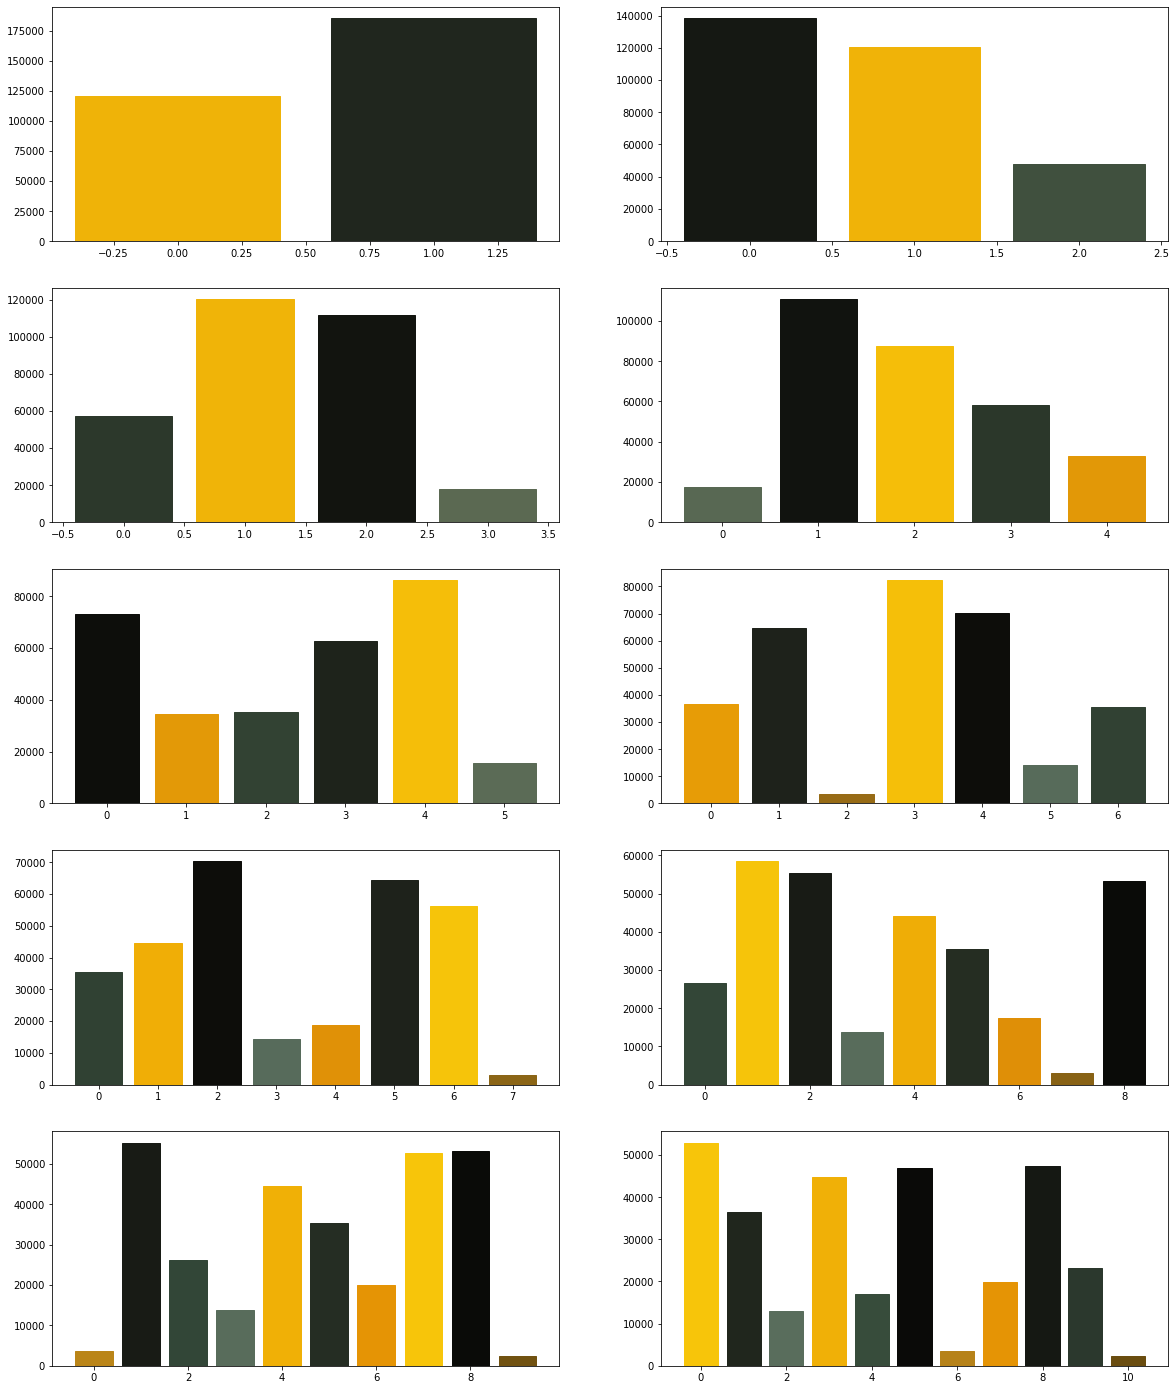

In [44]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20,25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x 
    
    clusters = KMeans(n_clusters = cluster_count)
    clusters.fit(numarray)
    
    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if(yaxis == 0):
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color('#%02x%02x%02x' % (
        math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]), 
        math.ceil(clusters.cluster_centers_[i][2])))
plot.show()

Your next goal is to test the above code for cluster sizes between 2 and
21 which will give you the figure given below.
\[Note:\] The following image was generated after 6
minutes. Optionally, you can add *print* statements to test whether your
code is working fine.
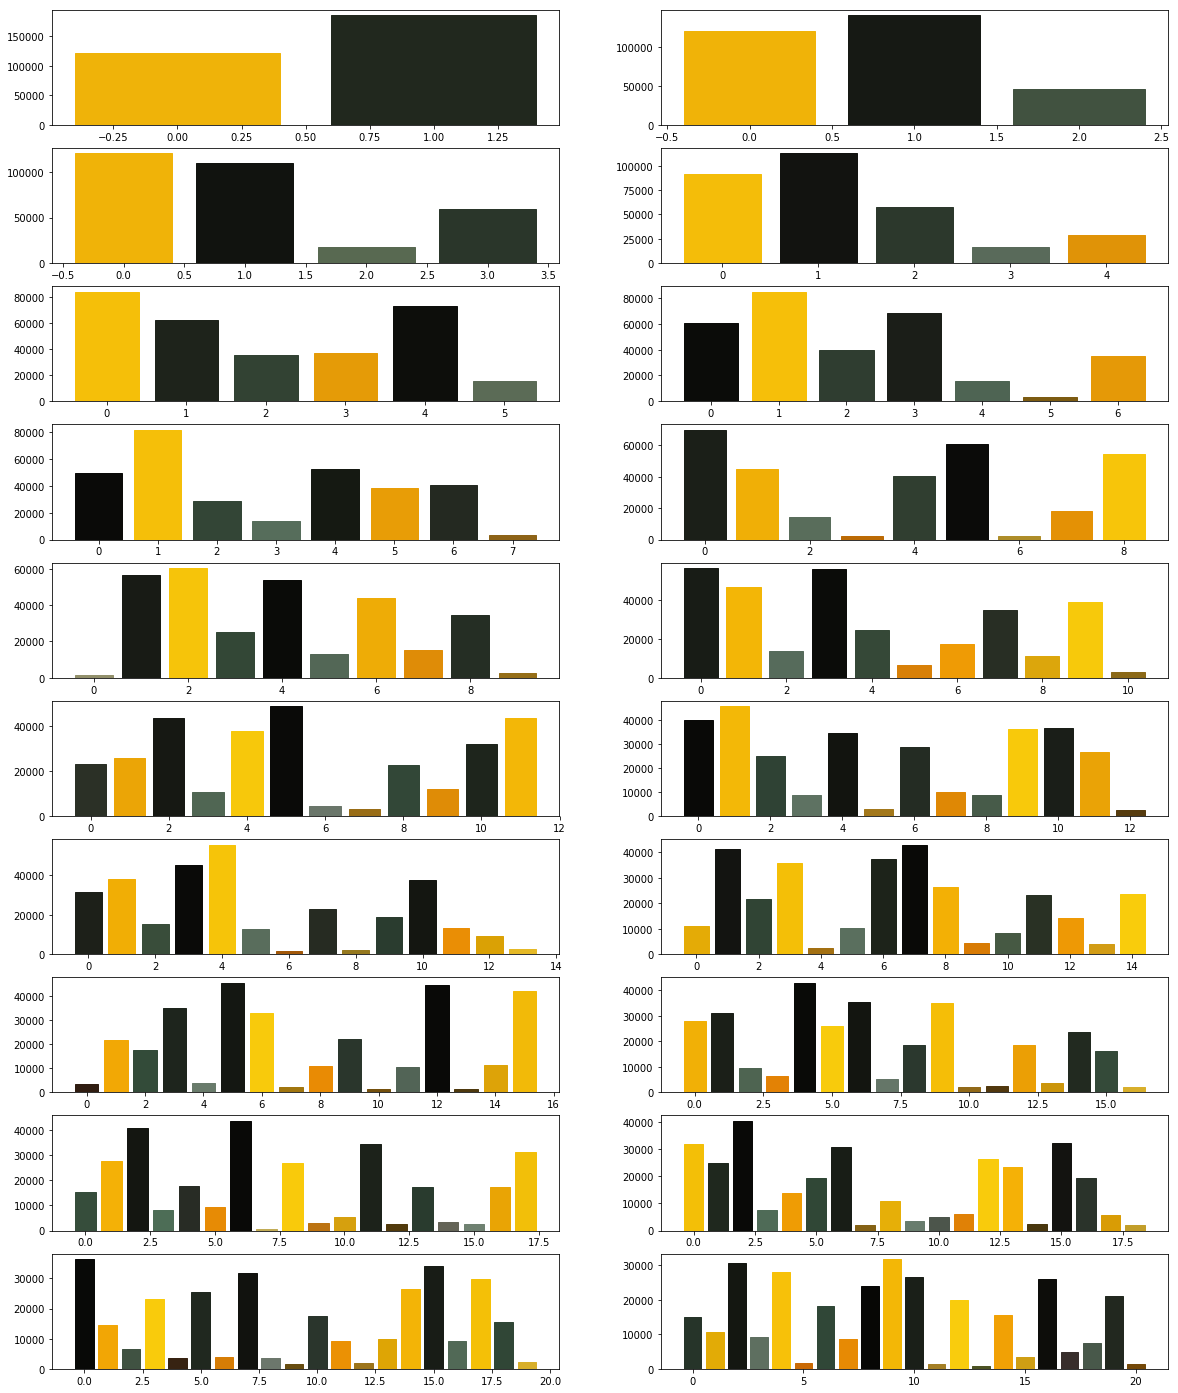
Now we modify the above algorithm to use **MiniBatchKMeans** clustering
algorithm (refer
[here](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans)).
Observe the changes.



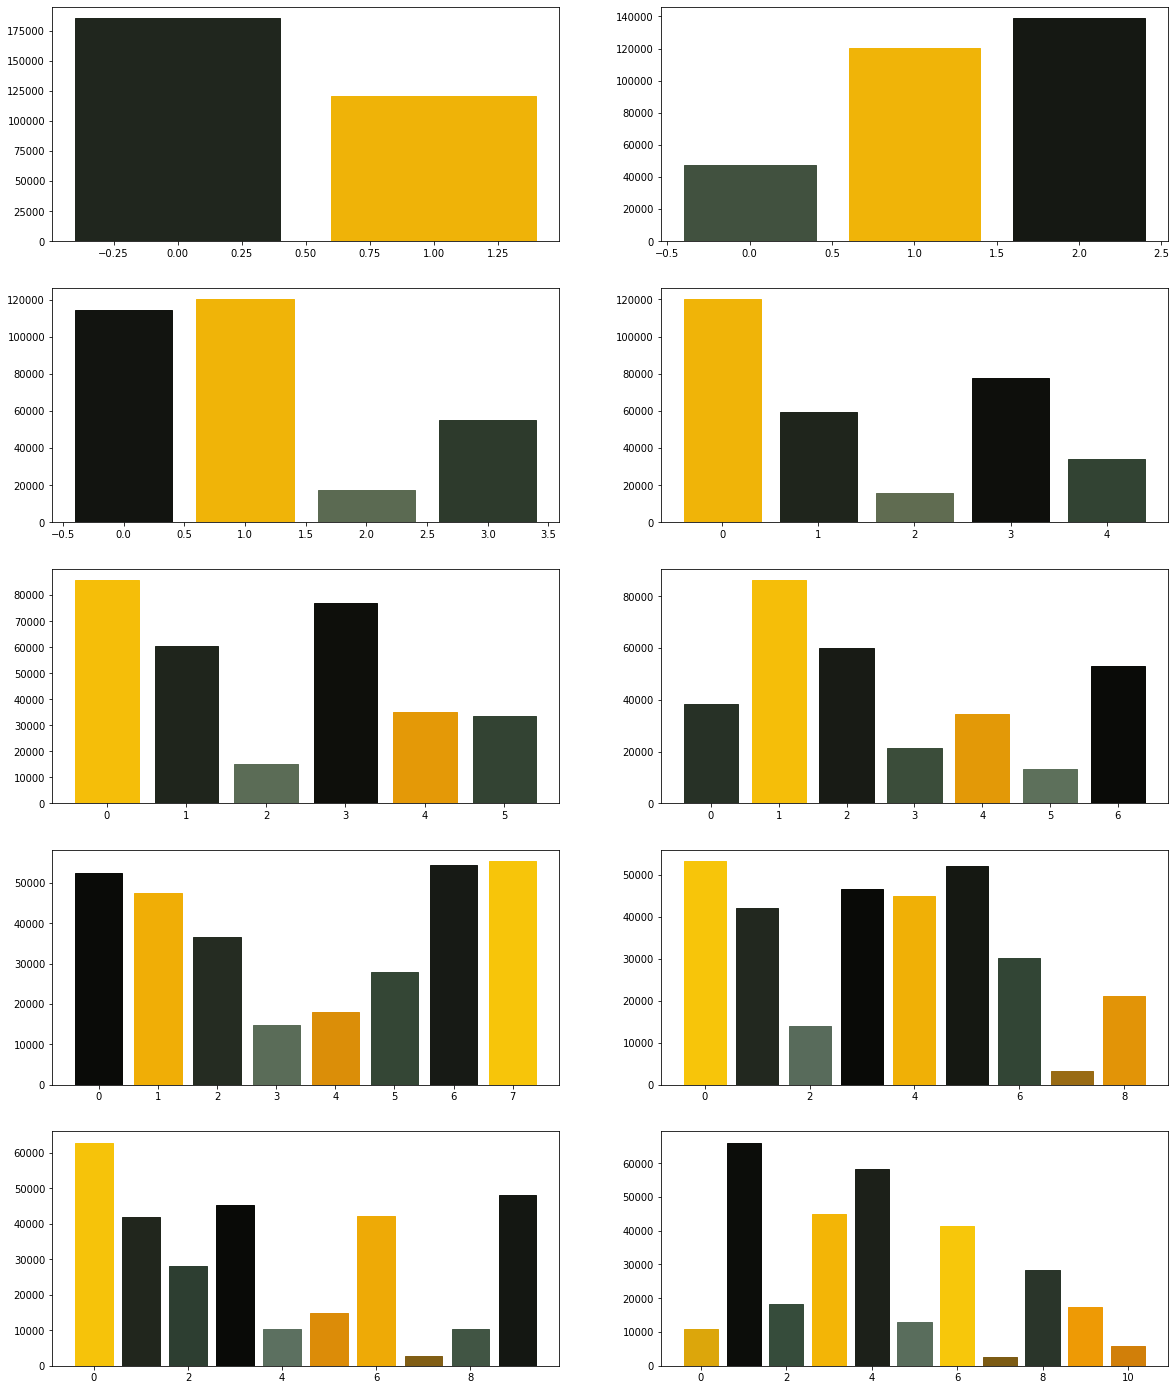

In [37]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans
imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20,25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x 
    
    clusters = MiniBatchKMeans(n_clusters = cluster_count)
    clusters.fit(numarray)
    
    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if(yaxis == 0):
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color('#%02x%02x%02x' % (
        math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]), 
        math.ceil(clusters.cluster_centers_[i][2])))
plot.show()

What did you observe? Your next goal is to test the above code for
cluster sizes between 2 and 21 which will give you the figure given
below.
What are your conclusions?
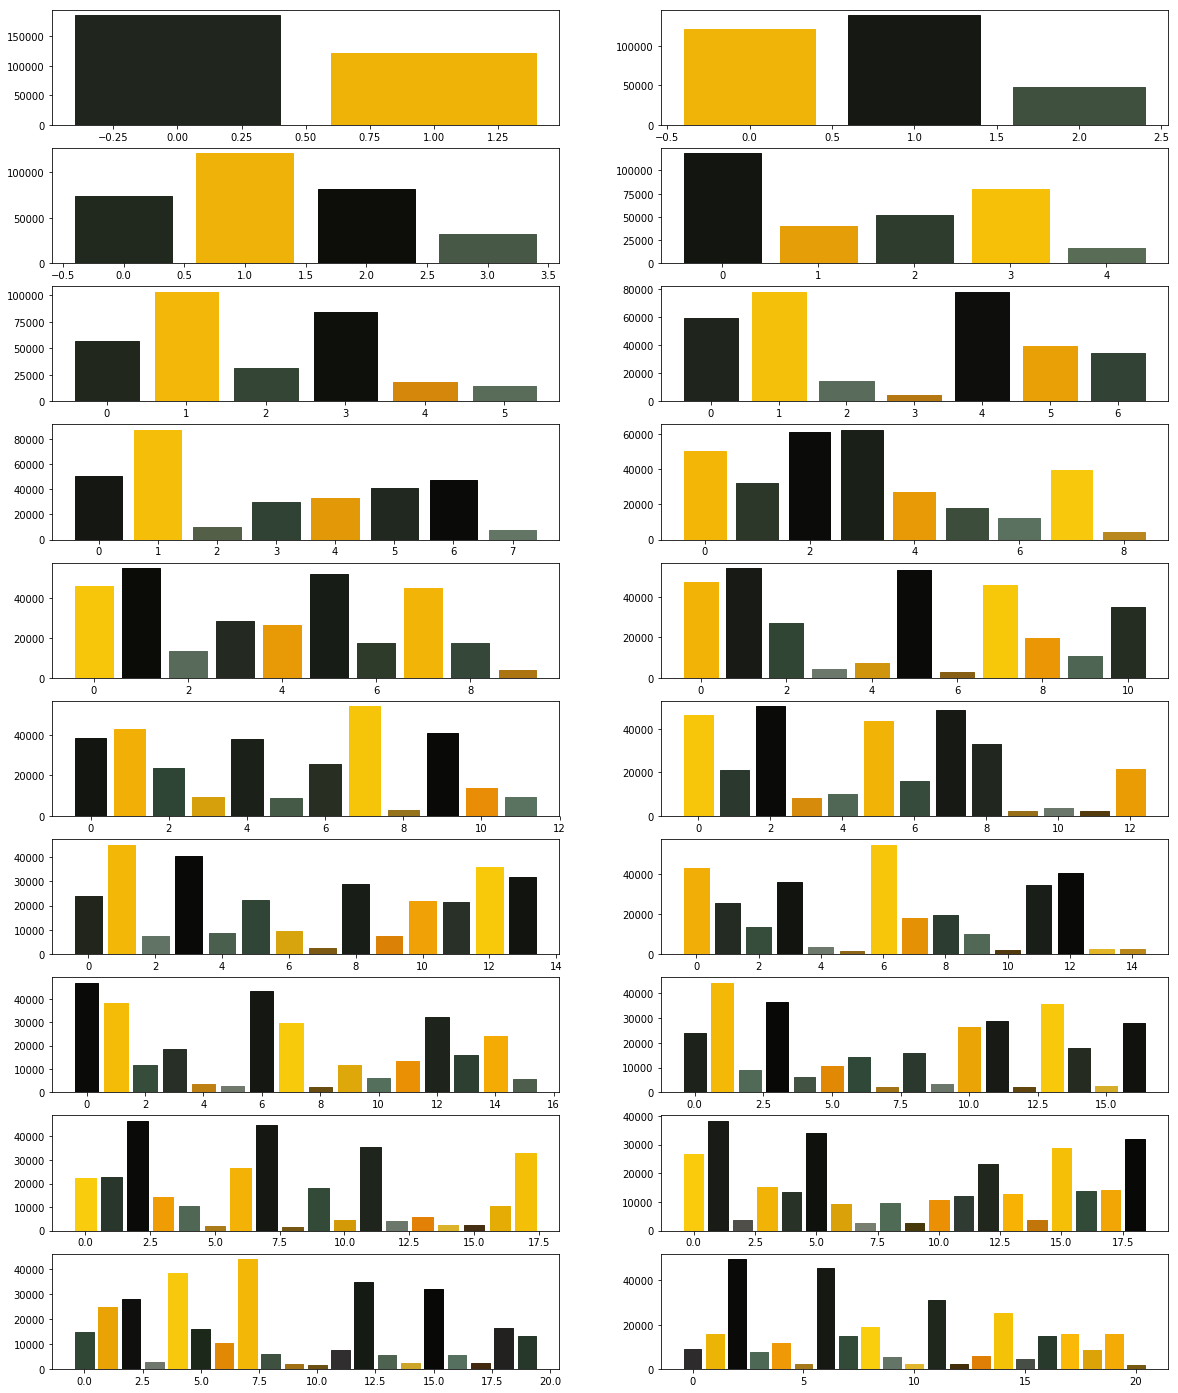
In order to compare the two algorithms, we consider the time taken by
each of these algorithms. We will repeat the above experiment, but this
time we will plot the time taken to obtain clusters of different sizes.
We start with **KMeans**.



Total time:  1 : 0.3299992084503174
Total time:  2 : 0.7810003757476807
Total time:  3 : 1.6860015392303467
Total time:  4 : 2.1200075149536133
Total time:  5 : 2.636997938156128
Total time:  6 : 3.154999256134033
Total time:  7 : 4.033000469207764
Total time:  8 : 7.50499963760376
Total time:  9 : 6.457000255584717
Total time:  10 : 7.6690003871917725
Total time:  11 : 8.60699987411499
Total time:  12 : 7.846995830535889
Total time:  13 : 9.799003601074219
Total time:  14 : 14.217998504638672
Total time:  15 : 11.923516988754272
Total time:  16 : 13.077000379562378
Total time:  17 : 10.878999948501587
Total time:  18 : 12.869999885559082
Total time:  19 : 11.200000047683716


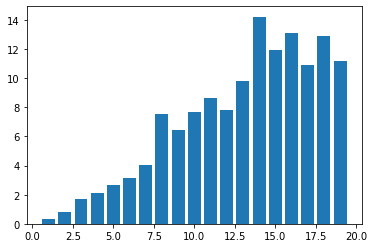

In [38]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x 
    
    start_time = time.time()
    clusters = KMeans(n_clusters = cluster_count)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

You may get a graph similar to the following.
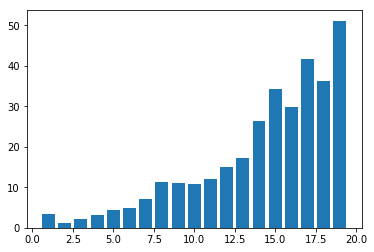
We now use **MiniBatchKMeans**.

Total time:  1 : 0.07896304130554199
Total time:  2 : 0.06600236892700195
Total time:  3 : 0.4049975872039795
Total time:  4 : 0.5270013809204102
Total time:  5 : 0.07199931144714355
Total time:  6 : 0.9469993114471436
Total time:  7 : 0.07200002670288086
Total time:  8 : 0.13399910926818848
Total time:  9 : 0.07799887657165527
Total time:  10 : 0.07700204849243164
Total time:  11 : 0.1099998950958252
Total time:  12 : 1.0269999504089355
Total time:  13 : 0.46599817276000977
Total time:  14 : 0.966001033782959
Total time:  15 : 0.8229987621307373
Total time:  16 : 0.8480007648468018
Total time:  17 : 0.08899974822998047
Total time:  18 : 0.7480015754699707
Total time:  19 : 0.6849989891052246


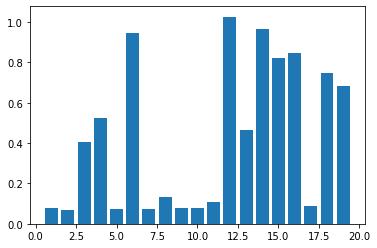

In [39]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans
imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x 
    
    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters = cluster_count)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

You may get a graph similar to the following.
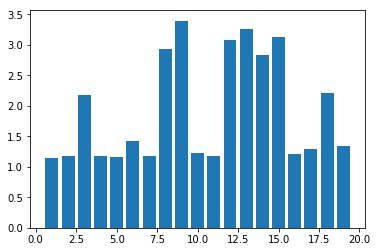
Now test the above code using **MiniBatchKMeans** algorithm with cluster
sizes between 2 and 50. What are your observations?
Finally we want to see whether we get the same cluster centers from both
the algorithms. Run the following program to see the cluster centers
produced by the two algorithms. We use two different colors (red and
black) to distinguish the cluster centers from the two algorithms.



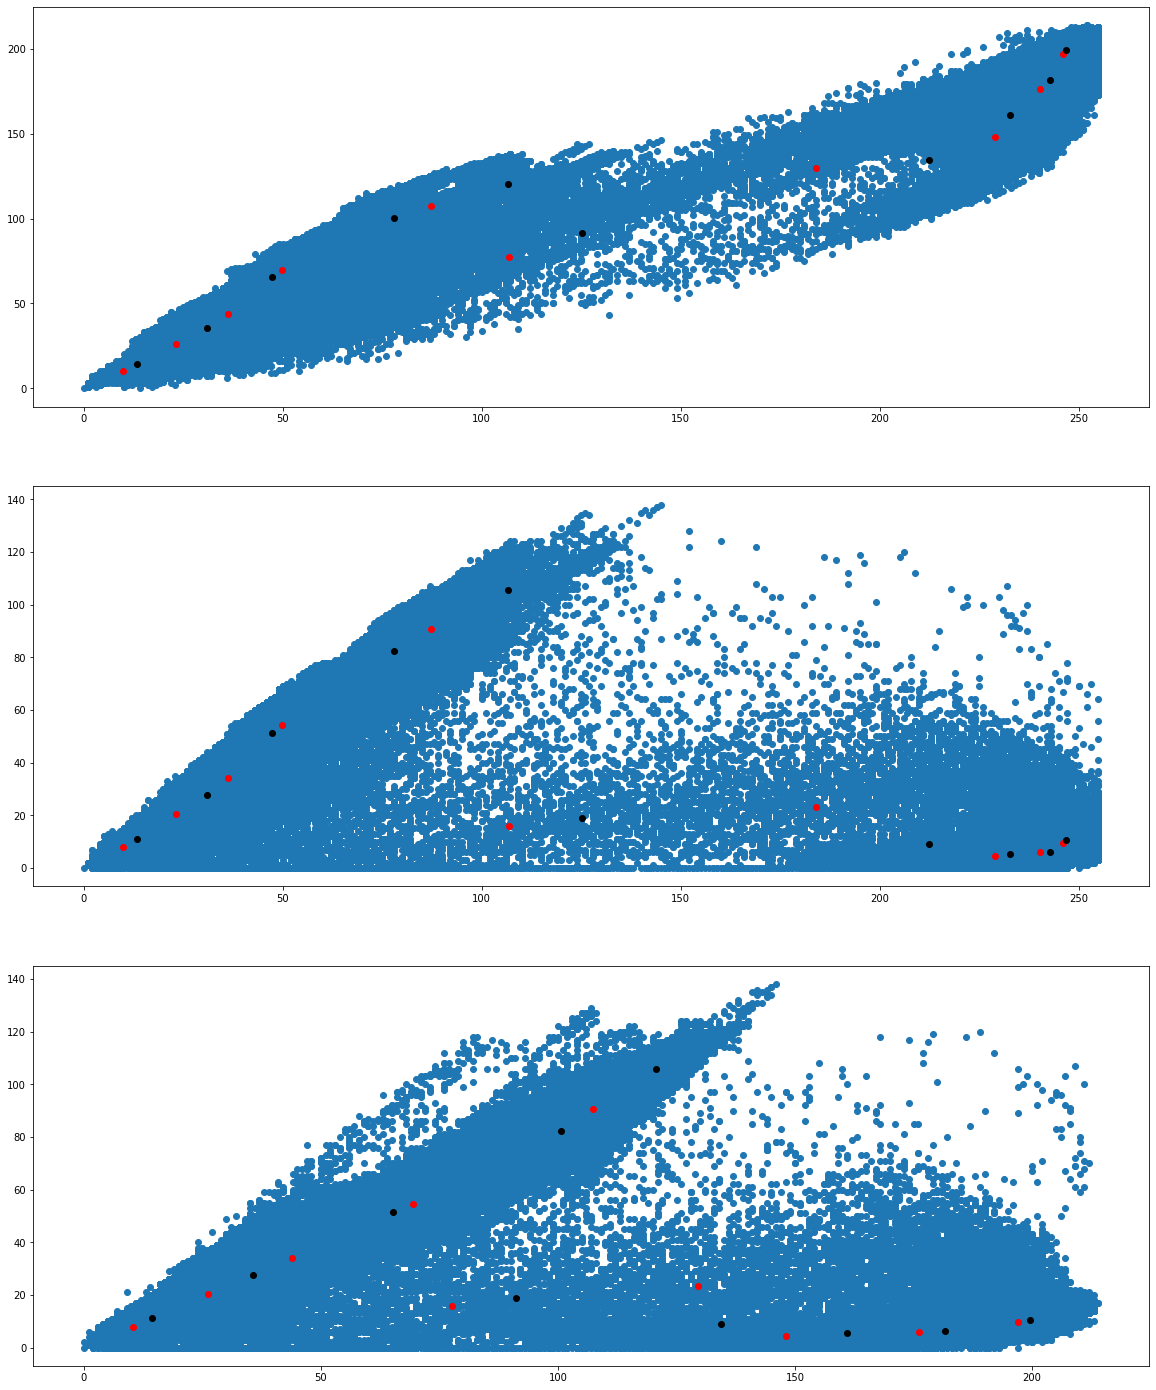

In [45]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

clusters = KMeans(n_clusters = cluster_count)
clusters.fit(numarray)

mclusters = MiniBatchKMeans(n_clusters = cluster_count)
mclusters.fit(numarray)

fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20,25))
#Scatter plot for RG (RGB)
axes[0].scatter(numarray[:,0],numarray[:,1])
axes[0].scatter(clusters.cluster_centers_[:,0],
            clusters.cluster_centers_[:,1], c='red')
axes[0].scatter(mclusters.cluster_centers_[:,0],
            mclusters.cluster_centers_[:,1], c='black')

#Scatter plot of RB (RGB)
axes[1].scatter(numarray[:,0],numarray[:,2])
axes[1].scatter(clusters.cluster_centers_[:,0],
            clusters.cluster_centers_[:,2], c='red')
axes[1].scatter(mclusters.cluster_centers_[:,0],
            mclusters.cluster_centers_[:,2], c='black')

#Scatter plot of GB (RGB)
axes[2].scatter(numarray[:,1],numarray[:,2])
axes[2].scatter(clusters.cluster_centers_[:,1],
            clusters.cluster_centers_[:,2], c='red')
axes[2].scatter(mclusters.cluster_centers_[:,1],
            mclusters.cluster_centers_[:,2], c='black')


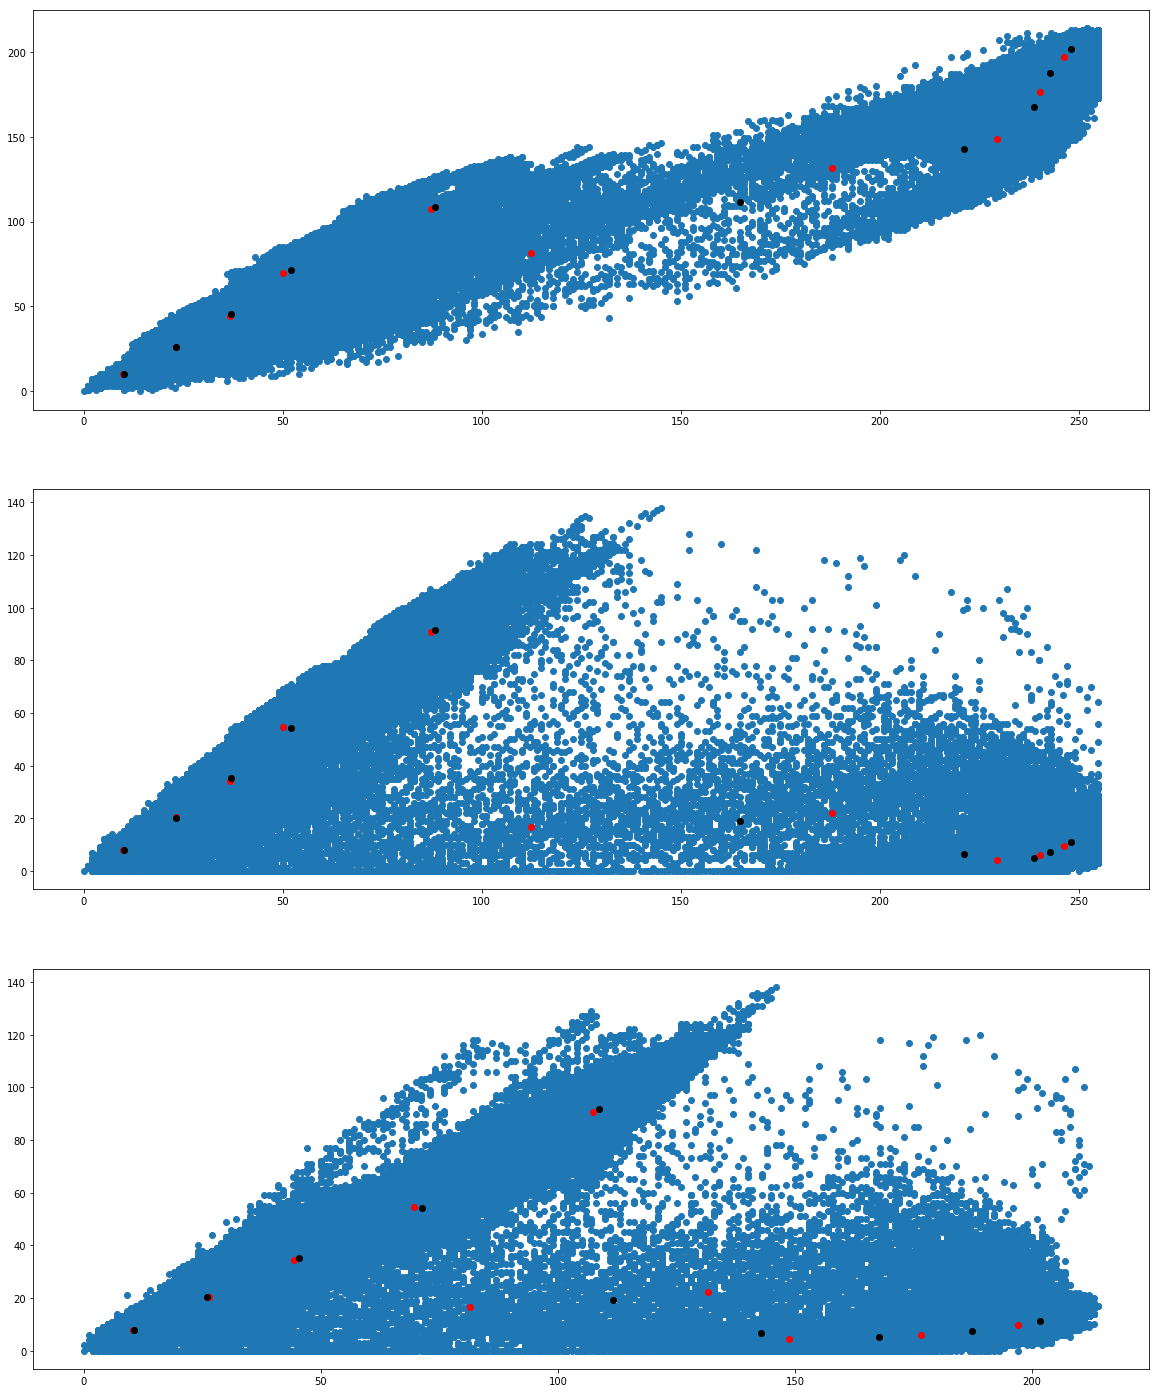
We would like to see how the individual pixel values have been
clustered. Run the following program a couple of times.



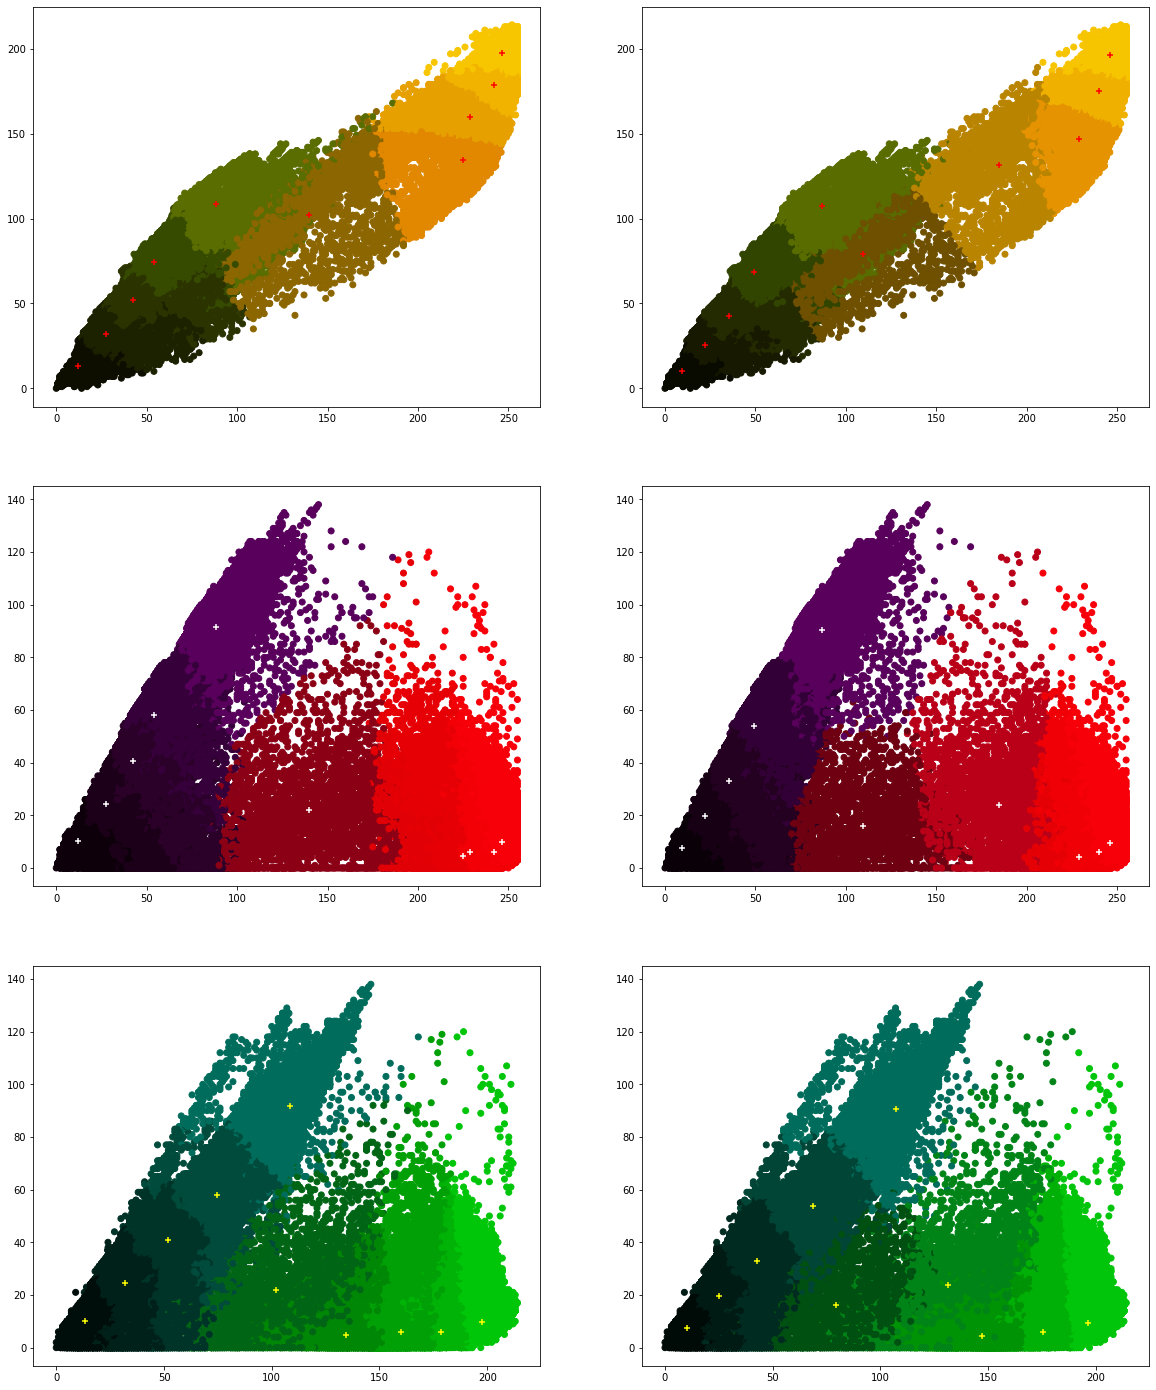

In [46]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters = cluster_count)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20,25))

#Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append('#%02x%02x%02x' % (
       math.ceil(mclusters.cluster_centers_[j][0]),
           math.ceil(mclusters.cluster_centers_[j][1]), 0))
                  
axes[0,0].scatter(numarray[:,0],numarray[:,1], c=colors)
axes[0,0].scatter(mclusters.cluster_centers_[:,0],
              mclusters.cluster_centers_[:,1], marker="+", c='red')

#Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append('#%02x%02x%02x' % (
       math.ceil(mclusters.cluster_centers_[j][0]),
           0, math.ceil(mclusters.cluster_centers_[j][2])))
                  
axes[1,0].scatter(numarray[:,0],numarray[:,2], c=colors)
axes[1,0].scatter(mclusters.cluster_centers_[:,0],
           mclusters.cluster_centers_[:,2], marker="+", c='white')

#Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append('#%02x%02x%02x' % (0, 
       math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2])))
                  
axes[2,0].scatter(numarray[:,1],numarray[:,2], c=colors)
axes[2,0].scatter(mclusters.cluster_centers_[:,1],
      mclusters.cluster_centers_[:,2], marker="+", c='yellow')

clusters = KMeans(n_clusters = cluster_count)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

#Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append('#%02x%02x%02x' % (
       math.ceil(clusters.cluster_centers_[j][0]),
           math.ceil(clusters.cluster_centers_[j][1]), 0))
                  
axes[0,1].scatter(numarray[:,0],numarray[:,1], c=colors)
axes[0,1].scatter(clusters.cluster_centers_[:,0],
              clusters.cluster_centers_[:,1], marker="+", c='red')

#Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append('#%02x%02x%02x' % (
       math.ceil(clusters.cluster_centers_[j][0]),
           0, math.ceil(clusters.cluster_centers_[j][2])))
                  
axes[1,1].scatter(numarray[:,0],numarray[:,2], c=colors)
axes[1,1].scatter(clusters.cluster_centers_[:,0],
     clusters.cluster_centers_[:,2], marker="+", c='white')

#Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append('#%02x%02x%02x' % (0, 
      math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2])))
                  
axes[2,1].scatter(numarray[:,1],numarray[:,2], c=colors)
axes[2,1].scatter(clusters.cluster_centers_[:,1],
      clusters.cluster_centers_[:,2], marker="+", c='yellow')
plot.show()


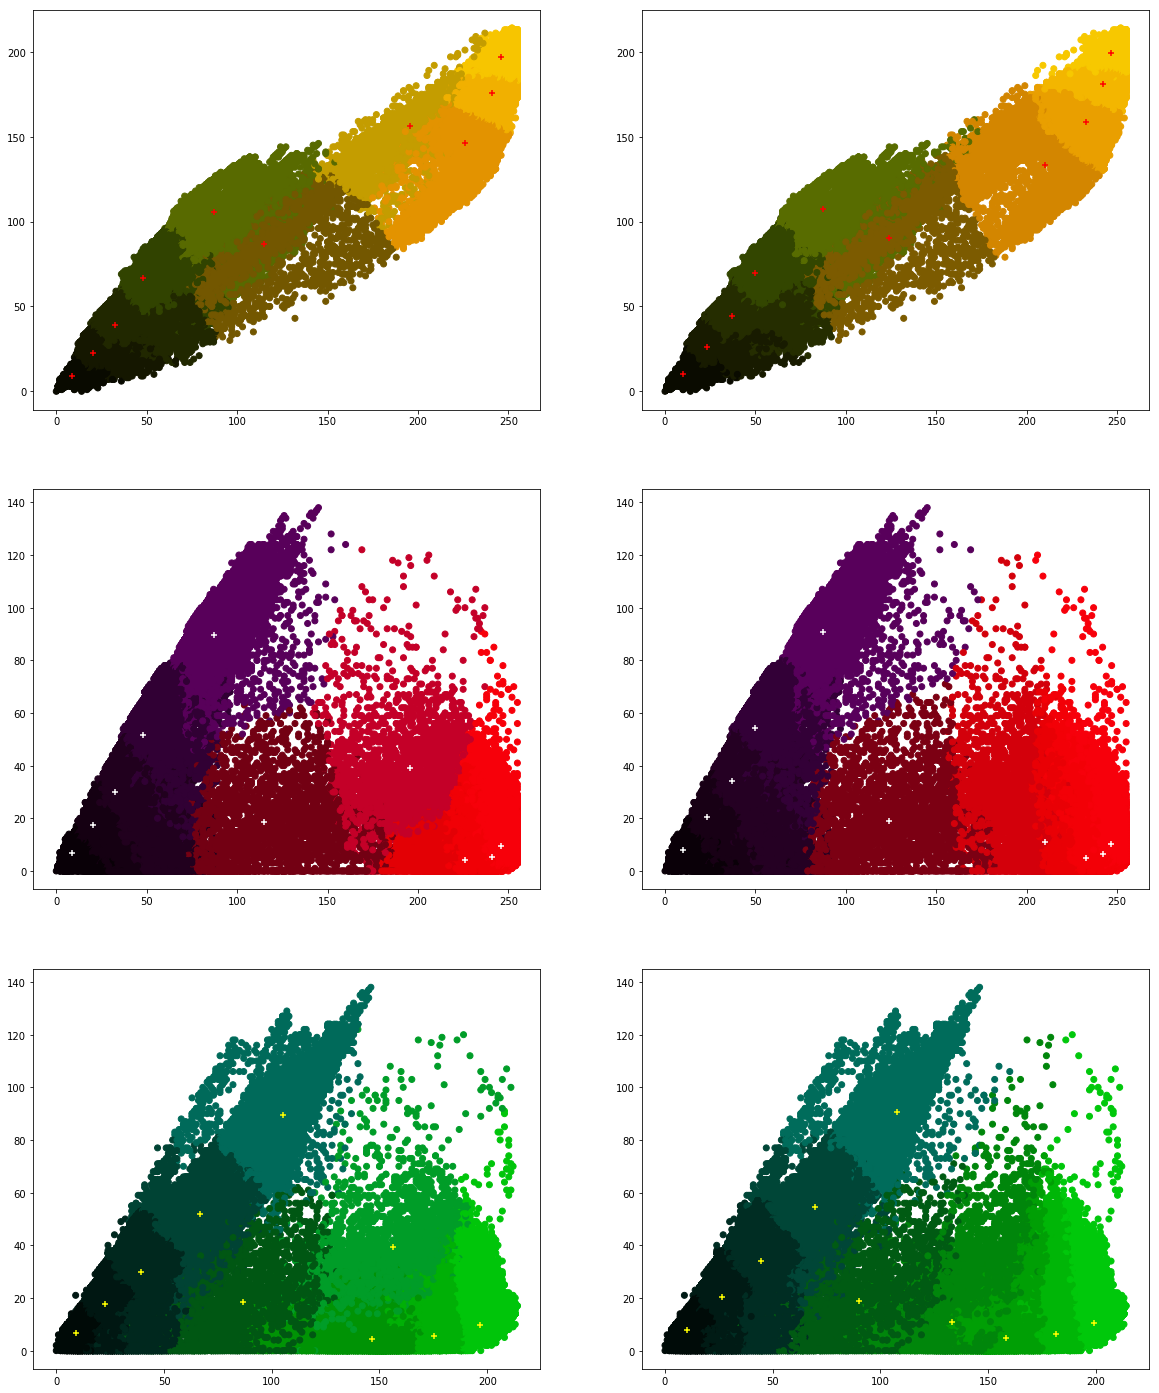
What are your conclusions?

